<a><img src="https://www.eafit.edu.co/SiteCollectionImages/logo.png" width="350" align="center"></a>
# Quiz 1: Estadistica en Analitica

<hr style="border:2px solid #004B85"> </hr>

# Maestría en ciencia de los datos y analítica
## 02/05/2021
## Estudiante

- ## Camilo Rivera Bedoya
- ## Juan David Corea
- ## Jose Ignacio Escobar
- ## Eliana Marcela Sierra
- ## Daniel Romero Cardona

<hr style="border:2px solid #004B85"> </hr>

# ¡¡¡Advertencia!!!

- este notebook fue desarrollado en Jupyter notebooks, el abrirlo con otros aplicativos como google colab u otros puede afectar el funconamiento del codigo o los markdowns.

<hr style="border:2px solid #004B85"> </hr>

<a name="conte"></a>

# Tabla de contenido
1. [Librerias y Funciones](#lib)
2. [Ejercicio Quiz 1](#quiz)
3. [Autoestudio](#auto)
    1. [Funcion K-NN propia](#auto_1)
    2. [Determinacion de K optimo con K entre 1 y 29 segun Eficiencia](#auto_2)
    3. [Simulacion de Prediccion](#auto_3)
    4. [Generacion Sintetica de Datos](#auto_4)

<a name="lib"></a><hr style="border:1px solid black"> </hr>
#  Librerias y Funciones [&#9673;](#conte)
<hr style="border:1px solid black"> </hr>

Se importan las librerias y se declaran las funciones necesarias para el funcionamiento de codigo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
sns.set_theme(style="ticks")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
def plot_conf_matrix(cm, classes,normalize,title,cmap=plt.cm.Blues):
    '''
    Funcion para graficar una matriz de confucion de un modelo de clasificacion supervisada
    
    input:
    -------------
    cm: Matriz de confusion del modelo
    Classes: Categorias de la matriz
    normalize: booleano que determina si se normaliza o no la matriz
    
    returns:
    -------------
    grafica de la matriz de confusion
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Verdaderos')
    plt.xlabel('Predecidos')
    plt.show()

<a name="quiz"></a><hr style="border:1px solid black"> </hr>
#  Ejercicio Quiz 1 [&#9673;](#conte)

En esta seccion se ejecuta el codigo nesesario para la solucion del ejercicio del quiz 1 

<hr style="border:1px solid black"> </hr>

### importamos y previsualizamos los datos

In [3]:
df = pd.read_csv('knn.csv', sep =';', decimal=',')
df.head(3)

,Edad,Medida del corazon,Medida del corazon.1,Diastole,Ventriculo,Sobrevivio
0,71,0.26,9.0,4.60,14.0,0
1,72,0.38,6.0,4.10,14.0,0
2,55,0.26,4.0,3.42,14.0,0


### Analisis exploratorio del comportamiento de los Datos

In [4]:
# Dividimos el DataFrame en Sobrevivientes y no Sobrevivientes
df_vivio = df[df['Sobrevivio']==1]
df_murio = df[df['Sobrevivio']==0]

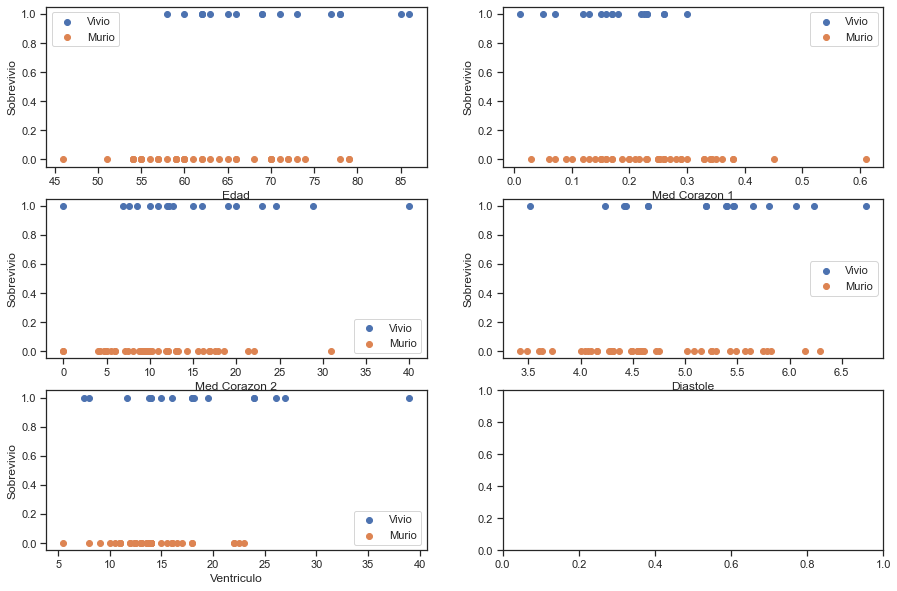

In [5]:
# Graficamos comparacion de los Parametros 
fig, axes = plt.subplots(3,2, figsize = (15,10))
axes[0,0].scatter(df_vivio.iloc[:,0],df_vivio.iloc[:,5], label = 'Vivio')
axes[0,0].scatter(df_murio.iloc[:,0],df_murio.iloc[:,5], label = 'Murio')
axes[0,0].legend()
axes[0,0].set_xlabel('Edad')
axes[0,0].set_ylabel('Sobrevivio')

axes[0,1].scatter(df_vivio.iloc[:,1],df_vivio.iloc[:,5], label = 'Vivio')
axes[0,1].scatter(df_murio.iloc[:,1],df_murio.iloc[:,5], label = 'Murio')
axes[0,1].legend()
axes[0,1].set_xlabel('Med Corazon 1')
axes[0,1].set_ylabel('Sobrevivio')

axes[1,0].scatter(df_vivio.iloc[:,2],df_vivio.iloc[:,5], label = 'Vivio')
axes[1,0].scatter(df_murio.iloc[:,2],df_murio.iloc[:,5], label = 'Murio')
axes[1,0].legend()
axes[1,0].set_xlabel('Med Corazon 2')
axes[1,0].set_ylabel('Sobrevivio')

axes[1,1].scatter(df_vivio.iloc[:,3],df_vivio.iloc[:,5], label = 'Vivio')
axes[1,1].scatter(df_murio.iloc[:,3],df_murio.iloc[:,5], label = 'Murio')
axes[1,1].legend()
axes[1,1].set_xlabel('Diastole')
axes[1,1].set_ylabel('Sobrevivio')

axes[2,0].scatter(df_vivio.iloc[:,4],df_vivio.iloc[:,5], label = 'Vivio')
axes[2,0].scatter(df_murio.iloc[:,4],df_murio.iloc[:,5], label = 'Murio')
axes[2,0].legend()
axes[2,0].set_xlabel('Ventriculo')
axes[2,0].set_ylabel('Sobrevivio')

plt.show()

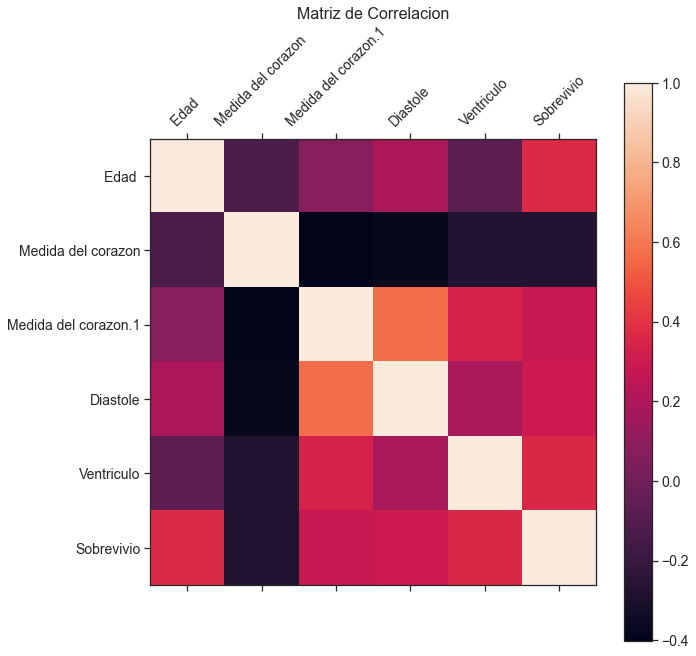

In [6]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de Correlacion', fontsize=16);

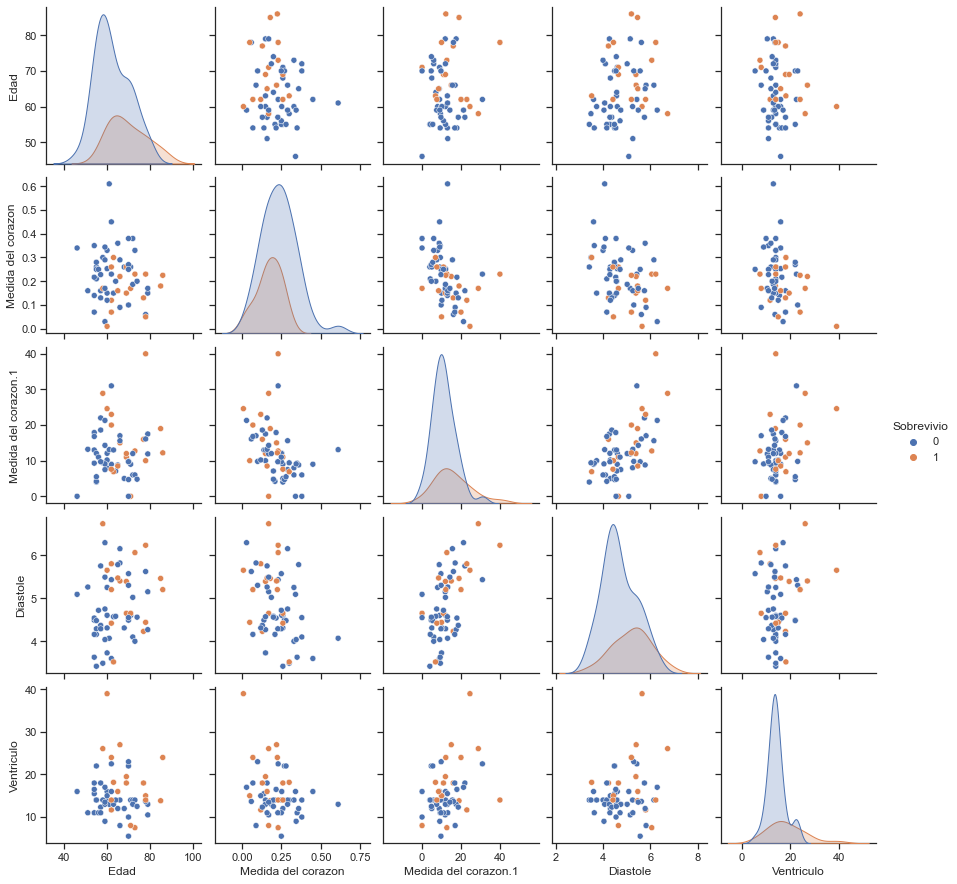

In [7]:
sns.pairplot(df, hue="Sobrevivio")

### Dividimos en matriz de datos y matriz de resultados

In [8]:
X = np.array(df.iloc[:,:5])
Y = np.array(df.loc[:,'Sobrevivio'])

### Calculamos la Matriz de Distancias

In [9]:
distancias = []
m,n = X.shape
for i in range(m):
    dist = [] ##vector de distancias de punto especifico
    for j in range(m):
        dist.append(np.linalg.norm(X[i]-X[j],2)) # Distancea euclidea entre los puntos
    distancias.append(dist)
pd.DataFrame(distancias) # se muestra la matriz de distancias

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.000000,3.203810,16.804535,11.592062,19.553325,5.392968,25.257470,11.064692,26.650450,17.529304,...,13.012711,5.375426,6.404444,26.748484,9.900348,9.321137,13.158275,14.338310,31.822285,9.110016
1,3.203810,0.000000,17.131165,13.602095,22.355556,4.588954,28.267320,12.219861,26.776514,19.376782,...,14.269369,2.816736,7.821464,29.551606,7.496833,9.972883,15.495683,15.740051,34.591320,10.132956
2,16.804535,17.131165,0.000000,9.767056,18.693285,13.220896,29.228257,6.659865,10.187998,9.241715,...,8.209839,19.110029,11.334130,28.033919,16.071444,9.472444,11.253133,6.800583,42.812346,7.934734
3,11.592062,13.602095,9.767056,0.000000,10.634289,11.399901,20.139074,4.574318,18.486119,6.095521,...,7.687567,16.155225,6.200660,19.840758,16.778283,6.441036,3.612797,6.299019,33.334359,5.286112
4,19.553325,22.355556,18.693285,10.634289,0.000000,21.167985,11.240876,14.875446,24.687406,9.891309,...,15.948917,24.829573,15.821770,10.717131,26.804634,16.402076,9.143725,14.227657,27.950587,15.815780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,9.321137,9.972883,9.472444,6.441036,16.402076,8.196420,24.582486,5.523531,18.540283,11.236196,...,10.247826,12.591156,3.879137,24.125659,12.816509,0.000000,9.816995,9.782826,36.677849,4.428002
57,13.158275,15.495683,11.253133,3.612797,9.143725,13.082068,19.206697,6.404936,19.491765,5.629467,...,7.030133,17.807746,8.711515,19.337890,18.402926,9.816995,0.000000,5.731785,31.973289,7.435926
58,14.338310,15.740051,6.800583,6.299019,14.227657,12.003809,24.743476,4.671403,15.515880,6.339380,...,2.904472,17.757637,9.583164,24.556127,16.253637,9.782826,5.731785,0.000000,37.038542,6.199026
59,31.822285,34.591320,42.812346,33.334359,27.950587,36.505990,20.245740,36.728332,51.276814,36.197869,...,36.682681,35.497603,34.144289,25.872572,41.022493,36.677849,31.973289,37.038542,0.000000,36.180616


### Finalmente implementamos el algoritmo K-NN, y calculamos la precision y el error del modelo

**sin Tomar en Cuenta el Mismo Punto Para el Calculo de Las distancias**

In [10]:
K = 5
Y_hat = []
for i in range(m):
    d_sort = np.array(distancias[i].copy())
    neigh = list(np.argsort(d_sort))
    K_neigh = neigh[1:K+1]
    class_kn= Y[K_neigh]
    class_X = int(stats.mode(class_kn).mode)
    Y_hat.append(class_X)
eva = [1 if Y[i]==Y_hat[i] else 0 for i in range(0,m)]
precision = sum(eva)/len(eva)
error =  1 - precision

In [11]:
pd.DataFrame([['Error', error*100],['Precision',precision*100]], columns = ['Parametro','Valor [%]'])

,Parametro,Valor [%]
0,Error,29.508197
1,Precision,70.491803


**Tomando en Cuenta el Mismo Punto Para el Calculo de LAs distancias**

In [12]:
K = 5
Y_hat = []
for i in range(m):
    d_sort = np.array(distancias[i].copy())
    neigh = list(np.argsort(d_sort))
    K_neigh = neigh[0:K]
    class_kn= Y[K_neigh]
    class_X = int(stats.mode(class_kn).mode)
    Y_hat.append(class_X)
eva = [1 if Y[i]==Y_hat[i] else 0 for i in range(0,m)]
precision = sum(eva)/len(eva)
error =  1 - precision

In [13]:
pd.DataFrame([['Error', error*100],['Precision',precision*100]], columns = ['Parametro','Valor [%]'])

,Parametro,Valor [%]
0,Error,16.393443
1,Precision,83.606557


**Comparando con Algoritmo K-NN de la libreria Sklearn**

In [14]:
K = 5
knn = KNeighborsClassifier(K)
knn.fit(X, Y.ravel())
score = knn.score(X, Y)

In [15]:
pd.DataFrame([['Error', (1 - score)*100],['Precision',score*100]], columns = ['Parametro','Valor [%]'])

,Parametro,Valor [%]
0,Error,16.393443
1,Precision,83.606557


# Conclusiones

si a la hora de calcular las distancias de los k vecinos mas cercanos a un punto, se tiene este mismo punto en cuenta dentro de los k puntos mas cercanos, la distancia de este punto sera menor, haciendo que la eficiencia sea mayor. como es el caso de el segundo modelo y del modelo con la libreria Sklearn por lo tanto tenemos los  dos resultados siguientes:

1. si no se toma el mismo punto para el calculo de la distancia se tiene una eficiencia del $70.492\%$


2. si si se toma este punto dentro de los k vecinos mas cercanos la eficiencia es del $83.607\%$


<a name="auto"></a><hr style="border:1px solid black"> </hr>
#  Autoestudio [&#9673;](#conte)

1. [Funcion K-NN propia](#auto_1)
2. [Determinacion de K optimo con K entre 1 y 29 segun Eficiencia](#auto_2)
3. [Simulacion de Prediccion](#auto_3)
4. [Generacion Sintetica de Datos](#auto_4)


<hr style="border:1px solid black"> </hr>

En esta seccion se realizan ejercicios adicionales de autoestudio a pesar de que no son requeridos en el quiz

definiremos dosmetodologias segun lo explicado anteriormente:

- **metodologia 1:** sin tener en cuenta el mismo punto para el calculo de distancia


- **metodologia 2:** teniendo en cuenta el mismo punto para el calculo de distancia

<a name="auto_1"></a>
## [&#9678;](#auto) Funcion K-NN propia sin distancia con el mismo
<hr style="border:1px solid black"> </hr>
 programamos los modelos implementados previamente dentro de una funcion

In [16]:
def knn_m1(X,Y,K):
    'K-NN con metodologia 1'
    distancias = []
    m,n = X.shape
    for i in range(m):
        dist = [] ##vector de distancias de punto especifico
        for j in range(m):
            dist.append(np.linalg.norm(X[i]-X[j],2)) # Distancea euclidea entre los puntos
        distancias.append(dist)
    pd.DataFrame(distancias) # se muestra la matriz de distancias

    Y_hat = []
    for i in range(m):
        d_sort = np.array(distancias[i].copy())
        neigh = list(np.argsort(d_sort))
        K_neigh = neigh[1:K+1]
        class_kn= Y[K_neigh]
        class_X = int(stats.mode(class_kn).mode)
        Y_hat.append(class_X)
    eva = [1 if Y[i]==Y_hat[i] else 0 for i in range(0,m)]
    precision = sum(eva)/len(eva)
    error =  1 - precision
    return error

In [17]:
def knn_m2(X,Y,K):
    'K-NN con metodologia 2'
    distancias = []
    m,n = X.shape
    for i in range(m):
        dist = [] ##vector de distancias de punto especifico
        for j in range(m):
            dist.append(np.linalg.norm(X[i]-X[j],2)) # Distancea euclidea entre los puntos
        distancias.append(dist)
    pd.DataFrame(distancias) # se muestra la matriz de distancias

    Y_hat = []
    for i in range(m):
        d_sort = np.array(distancias[i].copy())
        neigh = list(np.argsort(d_sort))
        K_neigh = neigh[0:K]
        class_kn= Y[K_neigh]
        class_X = int(stats.mode(class_kn).mode)
        Y_hat.append(class_X)
    eva = [1 if Y[i]==Y_hat[i] else 0 for i in range(0,m)]
    precision = sum(eva)/len(eva)
    error =  1 - precision
    return error

<a name="auto_2"></a>
## [&#9678;](#auto) Determinacion de K optimo con K entre 1 y 29 segun Eficiencia
<hr style="border:1px solid black"> </hr>

corremos las dos metodologias condiferentes valores de K para determinar el k optimo segun la eficiencia del modelo

In [18]:
errores_m1 = []
errores_m2 = []

Ks = range(1,30,2)
for i in Ks:
    error_m1 = knn_m1(X,Y,i)
    errores_m1.append(error_m1)

    error_m2 = knn_m2(X,Y,i)
    errores_m2.append(error_m2)

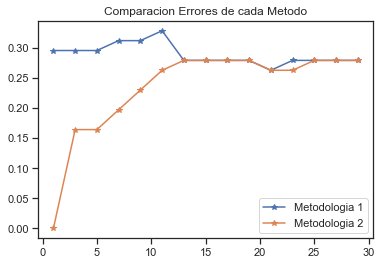

In [19]:
plt.plot(Ks,errores_m1,'-*', label = 'Metodologia 1')
plt.plot(Ks,errores_m2,'-*', label = 'Metodologia 2')
plt.title('Comparacion Errores de cada Metodo')
plt.legend()
plt.show()

ahora obtenemos el k minimo para la metodologia 1

In [20]:
k_optimo = Ks[errores_m1.index(min(errores_m1))]
print('El K optimo para el modelo segun su eficiencia es de K = ',k_optimo)

El K optimo para el modelo segun su eficiencia es de K =  21


### Conclusion

si tomamos en cuenta las dos metodologias el K optimo para el modelo seria $K = 21$

<a name="auto_3"></a>
## [&#9678;](#auto) Simulacion de Prediccion
<hr style="border:1px solid black"> </hr>

dividimos el dataframe en entrenamiento y testeo para evaluar el desempeño del algoritmo con datos que no hayan estado precentes en el entrenamiento, se hace de manera academica ya que la cantidad de datos no es suficiennte para implementar modelos adecuados

In [21]:
# Dividimos los datos en entrenamiento y testeo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [22]:
# Declaramos el modelo
knn_alg = KNeighborsClassifier(21)
# Entrenamos el modelo con los datos de entrenamiento
knn_alg.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=21)

In [23]:
# Con el modelo entrenado hacemos la prediccion con los datos de testeo
knn_pred = knn_alg.predict(X_test)
# Calculamos la precision del modelo
print("Precision alcanzada con el arbol de decision: ", metrics.accuracy_score(Y_test, knn_pred))

Precision alcanzada con el arbol de decision:  0.7692307692307693


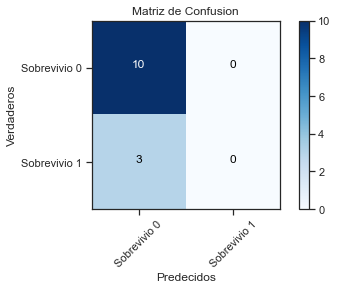

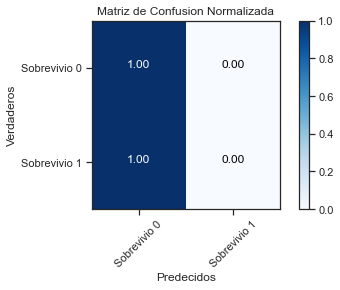

In [24]:
cm = confusion_matrix(Y_test, knn_pred)
plot_conf_matrix(cm, classes=["Sobrevivio 0","Sobrevivio 1"],normalize= False,  title='Matriz de Confusion')
plot_conf_matrix(cm, classes=["Sobrevivio 0","Sobrevivio 1"],normalize= True,  title='Matriz de Confusion Normalizada')

<a name="auto_4"></a>
## [&#9678;](#auto) Generacion Sintetica de Datos
<hr style="border:1px solid black"> </hr>

Generamos datos aleatorios para generar predicciones

In [25]:
edades = np.random.randint(min(df.iloc[:,0]), max(df.iloc[:,0]), 1000)
med_cor_1 = np.random.randint(min(df.iloc[:,1])*100, max(df.iloc[:,1]*100), 1000)/100
med_cor_2 = np.random.randint(min(df.iloc[:,2])*100, max(df.iloc[:,2]*100), 1000)/100
diastoles = np.random.randint(min(df.iloc[:,3])*100, max(df.iloc[:,3]*100), 1000)/100
ventriculos = np.random.randint(min(df.iloc[:,4])*100, max(df.iloc[:,4]*100), 1000)/100

In [26]:
df2=pd.DataFrame()
df2['Edad'] = edades
df2['medida corazon 1'] = med_cor_1
df2['medida corazon 2'] = med_cor_2
df2['Diastoles'] = diastoles
df2['Ventriculos'] = ventriculos
X2 = np.array(df2)

In [27]:
K = 21
Y_hat = []
for i in range(m):
    d_sort = np.array(distancias[i].copy())
    neigh = list(np.argsort(d_sort))
    K_neigh = neigh[1:K+1]
    class_kn= Y[K_neigh]
    class_X = int(stats.mode(class_kn).mode)
    Y_hat.append(class_X)
eva = [1 if Y[i]==Y_hat[i] else 0 for i in range(0,m)]
precision = sum(eva)/len(eva)
error =  1 - precision

In [28]:
Y_hat =[]
for X2_sin in X2:
    D_predict=[]
    for j in range(0,m):
        D_predict.append(np.linalg.norm(X2_sin-X[j],2))
    d_sort=np.array(D_predict.copy())
    neigh = list(np.argsort(d_sort))
    K_neigh = neigh[1:K+1]
    Class_Kn= Y[K_neigh]
    Class_X = int(stats.mode(Class_Kn).mode)
    Y_hat.append(Class_X)

In [29]:
df2['Sobrevivio'] = Y_hat

In [30]:
df2['Generado'] = 1

In [31]:
df['Generado'] = 0

In [32]:
df2.columns = df.columns

In [33]:
df3 = pd.concat([df2,df])

In [34]:
df3

,Edad,Medida del corazon,Medida del corazon.1,Diastole,Ventriculo,Sobrevivio,Generado
0,83,0.390,21.86,4.10,14.84,0,1
1,71,0.460,20.30,5.56,30.81,0,1
2,66,0.420,14.72,3.55,23.57,0,1
3,47,0.240,37.66,5.96,5.97,0,1
4,77,0.450,4.60,4.98,27.51,0,1
...,...,...,...,...,...,...,...
56,63,0.300,6.90,3.52,18.16,1,0
57,59,0.170,14.30,5.49,13.50,0,0
58,57,0.228,9.70,4.29,11.00,0,0
59,78,0.230,40.00,6.23,14.00,1,0


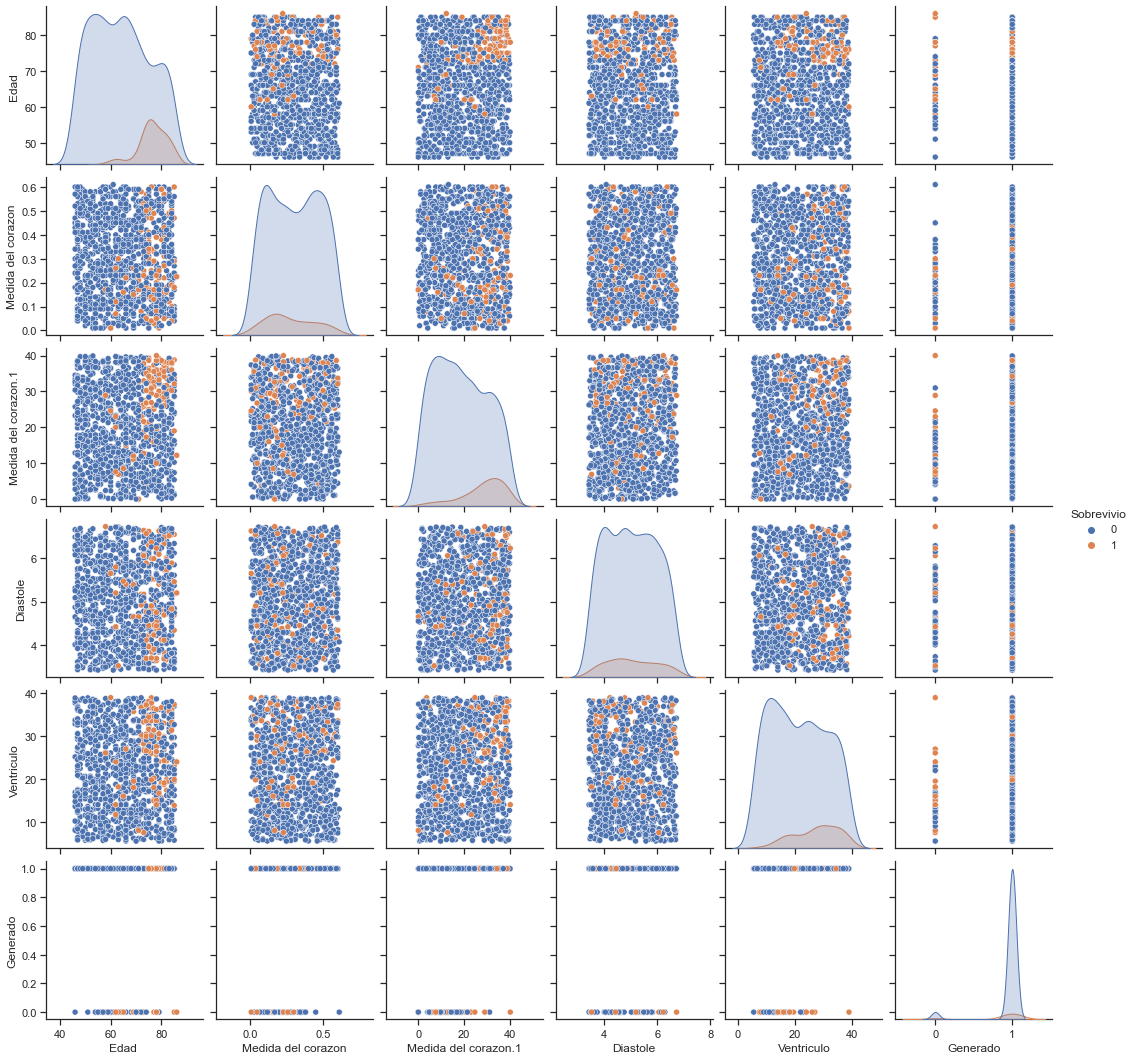

In [35]:
sns.pairplot(df3, hue="Sobrevivio")

## Conclusion

el metodo de generacion sintetica de datos no respeta la distribucion o el comportamiento de los datos originales por lo que los casos generados pueden ser en multiples ocaciones irrealos por lo que se deben explorar diferentes metodologias para la generacion de estos datos